## <font size=5> <strong>Women Heart Problem Prediction


## Essential imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


## Importing and understanding the dataset

In [2]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv("heart.csv")

Saving heart.csv to heart.csv


#### Shape of dataset

In [50]:
dataset.shape

(303, 15)

#### Printing out a few columns

In [51]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sexe
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [52]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sexe
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1,0
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,0


#### Description

In [53]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sexe
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.0
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.0
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.0
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.0
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,0.0


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  sexe      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


We have no missing values

#### Ynderstanding the columns better:

In [55]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [56]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [57]:
dataset["target"].unique()

array([1, 0])

In [58]:
#removing male data
dataset = dataset[dataset["sex"] == 0]

print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2     41    0   1       130   204    0        0      172      0      1.4   
4     57    0   0       120   354    0        1      163      1      0.6   
6     56    0   1       140   294    0        0      153      0      1.3   
11    48    0   2       130   275    0        1      139      0      0.2   
14    58    0   3       150   283    1        0      162      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   55    0   0       128   205    0        2      130      1      2.0   
292   58    0   0       170   225    1        0      146      1      2.8   
296   63    0   0       124   197    0        1      136      1      0.0   
298   57    0   0       140   241    0        1      123      1      0.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  sexe  
2        2   0     2       1     0  
4        2   

This is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [59]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
cp          0.522233
oldpeak     0.500454
thal        0.493197
ca          0.487205
exang       0.486509
slope       0.458207
trestbps    0.391957
thalach     0.252103
fbs         0.218218
age         0.207531
chol        0.121769
restecg     0.032553
sex              NaN
sexe             NaN
Name: target, dtype: float64


Most columns are moderately correlated with target

## Train Test split

In [60]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [61]:
X_train.shape

(76, 14)

In [62]:
X_test.shape

(20, 14)

In [63]:
Y_train.shape

(76,)

In [64]:
Y_test.shape

(20,)

## Model Fitting

In [65]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [67]:
Y_pred_lr.shape

(20,)

In [68]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 95.0 %


### Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [70]:
Y_pred_nb.shape

(20,)

In [71]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 100.0 %


### SVM

In [72]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [73]:
Y_pred_svm.shape

(20,)

In [74]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 95.0 %


### K Nearest Neighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier
#tried sevral classifiers number and 7 gives the best accuracy
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [76]:
Y_pred_knn.shape

(20,)

In [77]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 75.0 %


### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [79]:
print(Y_pred_dt.shape)

(20,)


In [80]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 95.0 %


### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [84]:
Y_pred_rf.shape

(20,)

In [85]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


### XGBoost

In [86]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [87]:
Y_pred_xgb.shape

(20,)

In [88]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 95.0 %


## Output final score

In [89]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 95.0 %
The accuracy score achieved using Naive Bayes is: 100.0 %
The accuracy score achieved using Support Vector Machine is: 95.0 %
The accuracy score achieved using K-Nearest Neighbors is: 75.0 %
The accuracy score achieved using Decision Tree is: 95.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 95.0 %


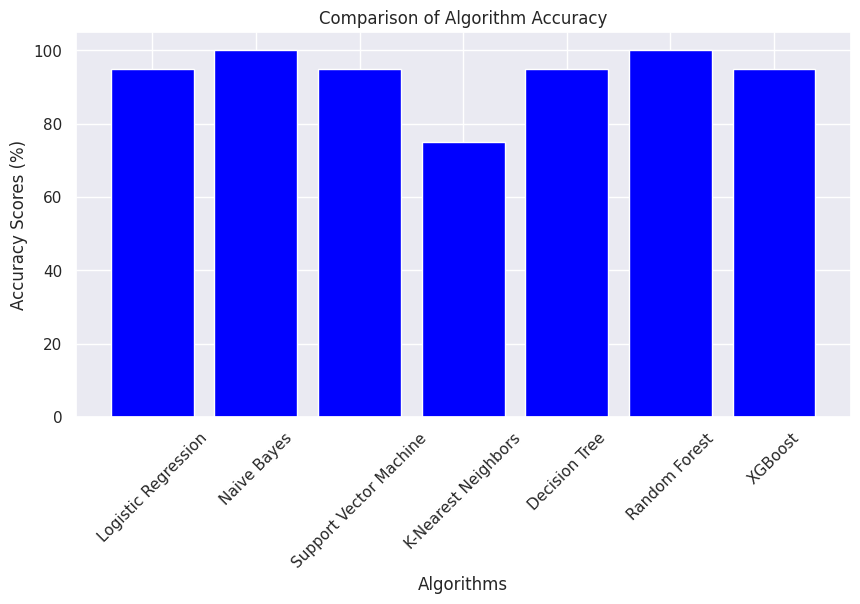

In [96]:
# Plotting
plt.figure(figsize=(10, 5))
plt.bar(algorithms, scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores (%)')
plt.title('Comparison of Algorithm Accuracy')
plt.xticks(rotation=45)
plt.show()


Naive bayes and Random Forest gives an excellent 100% accuracy.